<a href="https://colab.research.google.com/github/himanshu1718/Playstore_App_Analysis/blob/main/Playstore_App_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  
# **Dataset Description:**

*   ## **There are two datasets; one is Playstore data of apps and another is app reviews by users.**
*   ## **Each app has no of installs, rating, reviews, Price, Category, Android version etc.**
*   ## **This data has potential to extract useful insights for capturing the android market.**



# Main Objectives :-
## 1) Actionable insights can be drawn for developers to work on and capture the Android market

## 2) key factors responsible for app engagement and success.

In [2]:
# Importing the Python library and packages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading the dataset
# To access data set from drive mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# path_reviews ='https://drive.google.com/file/d/1axDhTG4GXHGnPuQLf6ItSzUlL5eXv0eL/view?usp=drive_link'
# path_apps = 'https://drive.google.com/file/d/1V8xmRKJSaXlA7_cNLlgFDfdqyLhwEjHQ/view?usp=drive_link'
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/Copy of PlayStore Data.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Datasets/Copy of UserReviews.csv')

### First we will analyse and clean the first data set (Playstore data) and after that we'll analyse and clean the second data set(UserReviews Data).

#play store Data exploration

In [5]:
# let's first check the dataset
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# checking no of roes and columns in the dataset
df1.shape

(10841, 13)

In [7]:
# getting the idea of dataset like data types and null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Cleaning the data of playstore dataset
1) Finding carbage values from all the colums and drop the rows

2) Coverting 'Size' column into valid numeric column

3) Coverting 'Reviews' column into valid numeric column

4) Coverting 'Installs' column into valid numeric column

In [8]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
# let's explore the category column
df1['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

value 1.9 seems unneccessary in category column so we have to delete rows which contains 1.9 category.

In [10]:
index = df1[df1['Category']=='1.9'].index
df1.drop(axis =0, index=index, inplace = True)

In [11]:
# check random rows for analysing the data to be cleaned
df1.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6865,Bacterial Vaginosis Treatment,MEDICAL,NaN,0,3.4M,50+,Free,0,Everyone,Medical,"June 25, 2018",1.0,4.0 and up
9944,PlugShare,MAPS_AND_NAVIGATION,4.7,4501,26M,"100,000+",Free,0,Teen,Maps & Navigation,"July 25, 2018",3.5.1,4.0.3 and up
2751,LightInTheBox Online Shopping,SHOPPING,4.0,41986,26M,"5,000,000+",Free,0,Teen,Shopping,"August 6, 2018",3.69.0,4.1 and up
7696,Foothills CP,FAMILY,5.0,4,7.8M,100+,Free,0,Teen,Education,"June 25, 2018",3.8.0,4.1 and up
3530,Microsoft PowerPoint,PRODUCTIVITY,4.5,618796,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"July 11, 2018",16.0.10325.20043,4.4 and up


By the result above, we can see the sizes of the apps are in megabytes(M) and kilobytes(k). We will keep all the values of the column 'Size' in one unit(Megabyte).

In [12]:
def clean_size(size):
  if size[-1] == 'M':
    new_size = float(size.replace('M', ''))
  elif size[-1] == 'k':
    new_size = float(size.replace('k', ''))
    new_size = round(float(new_size/1024), 2)
  else:
    new_size = size
  return new_size

In [13]:
df1['Size'] = df1['Size'].apply(clean_size)

I tried to change the data type of Size column, but there are str values such as 'depend on the app'. So dtype remains as 'O'

column 'Installs' has values with , and + so we have to remove them

In [14]:
# df1['Installs'].replace('+', '')
def clean_installs(inst):
  if '+' in inst:
    new_installs = inst.replace('+', '')
    if ',' in inst:
      final_installs = new_installs.replace(',', '')
    else:
      final_installs = new_installs
  else:
    final_installs = inst
  return final_installs

In [15]:
df1['Installs'] = df1['Installs'].apply(clean_installs)

In [16]:
# let's change the data type of column 'Installs' from Object to float
df1['Installs'] = df1['Installs'].astype('float')

In [17]:
df1['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

as there are 800 apps which are paid so we have to see the proce section for the currency verification.

In [18]:
df1['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: Price, Length: 92, dtype: int64

Now we will remove the $ sign from the values in 'Price' and change the data type as 'float'

In [19]:
def clean_price(p):
  if '$' in p:
    new_P = p.replace('$', '')
  else:
    new_P = p
  return new_P

In [20]:
df1['Price'] = df1['Price'].apply(clean_price)

In [21]:
df1['Price'].sample(5)

7835    0
8113    0
5276    0
7251    0
8111    0
Name: Price, dtype: object

In [22]:
df1['Price'] = df1['Price'].astype('float')

Now let's once check our dataset info

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


In [24]:
# Let's check null value sin eac column
df1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

<Axes: >

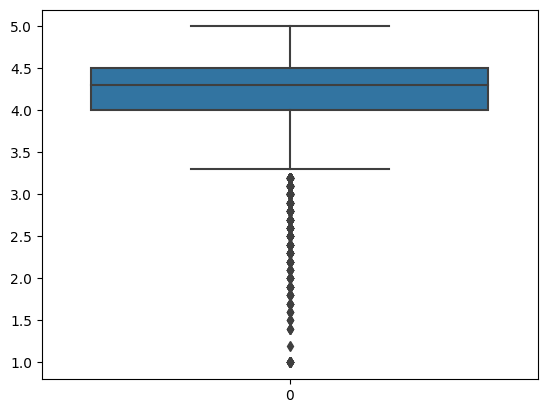

In [25]:
sns.boxplot(df1.Rating)

as there are many outliers so we should not fill null values with mean, as it will create more biasness in the data rather than median, mode.

In [26]:
# filling null values in 'Rating' with the median of non-null values.
rating_median=df1['Rating'].median(skipna = True)
df1['Rating']=df1['Rating'].fillna(rating_median)

In [27]:
df1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [28]:
# now we can drop other null value as there are few, so it will not impact the data much
index = df1[df1['Type'].isna()].index
df1.drop(axis=0,inplace= True, index=index)

index = df1[df1['Android Ver'].isna()].index
df1.drop(axis=0, inplace=True, index=index)

index = df1[df1['Current Ver'].isna()].index
df1.drop(axis=0, inplace=True, index=index)

In [29]:
df1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [30]:
df1['App'].duplicated().sum()

1181

In [31]:
# removing duplicate values from 'App'
df1.drop_duplicates(subset = 'App', inplace = True)

In [32]:
df1['App'].duplicated().sum()

0

In [33]:
df1['Reviews'] = df1['Reviews'].astype('int')

In [34]:
df1['Last Updated'].sample(5)

7825         July 15, 2017
8536    September 17, 2015
913          July 20, 2018
2846         July 28, 2018
8400    September 16, 2013
Name: Last Updated, dtype: object

we have to change the date format and data type for dealing with this column

In [35]:
df1['Last Updated'] = pd.to_datetime(df1['Last Updated'])

In [36]:
df1['Last Updated'].sample(5)

8487   2018-08-06
2069   2018-07-31
4395   2016-07-15
6602   2016-05-27
5157   2017-11-30
Name: Last Updated, dtype: datetime64[ns]

In [37]:
# create new columns with seperate month and year for better analysis option
df1['month'] =df1['Last Updated'].apply(lambda x: x.strftime('%m')).astype(int)
df1['year'] =df1['Last Updated'].apply(lambda x: x.strftime('%Y')).astype(int)

In [38]:
df1['Android Ver'].value_counts()

4.1 and up            2202
4.0.3 and up          1395
4.0 and up            1283
Varies with device     989
4.4 and up             818
2.3 and up             615
5.0 and up             512
4.2 and up             371
2.3.3 and up           273
2.2 and up             239
3.0 and up             230
4.3 and up             221
2.1 and up             133
1.6 and up             115
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              31
5.1 and up              22
1.5 and up              19
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [134]:
def clean_Ver(a):
  if a =='Varies with device':
    return a
  else:
    return ((a[:1])+".0 and up")

In [135]:
df1['Android Ver'] = df1['Android Ver'].apply(clean_Ver)

In [136]:
df1['Android Ver']

0                4.0 and up
1                4.0 and up
2                4.0 and up
3                4.0 and up
4                4.0 and up
                ...        
10836            4.0 and up
10837            4.0 and up
10838            2.0 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 9648, dtype: object

In [42]:
# creating a new column 'Revenue'
df1['Revenue']=df1['Installs']*df1['Price']

In [43]:
# Now look at the cleaned dataset for leading to analysis segment
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9648 non-null   object        
 1   Category        9648 non-null   object        
 2   Rating          9648 non-null   float64       
 3   Reviews         9648 non-null   int64         
 4   Size            9648 non-null   object        
 5   Installs        9648 non-null   float64       
 6   Type            9648 non-null   object        
 7   Price           9648 non-null   float64       
 8   Content Rating  9648 non-null   object        
 9   Genres          9648 non-null   object        
 10  Last Updated    9648 non-null   datetime64[ns]
 11  Current Ver     9648 non-null   object        
 12  Android Ver     9648 non-null   object        
 13  month           9648 non-null   int64         
 14  year            9648 non-null   int64         
 15  Rev

In [44]:
df1.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,month,year,Revenue
3429,Wallpaper,PERSONALIZATION,4.5,69488,9.7,1000000.0,Free,0.0,Everyone,Personalization,2018-07-08,6.07,4.1 and up,7,2018,0.0
8838,DS-20000S,PRODUCTIVITY,1.8,12,14.0,1000.0,Free,0.0,Everyone,Productivity,2018-08-03,1.2.2,4.1 and up,8,2018,0.0
6156,Cordova BG Geolocation,MAPS_AND_NAVIGATION,3.0,4,Varies with device,1000.0,Free,0.0,Everyone,Maps & Navigation,2018-05-25,Varies with device,Varies with device,5,2018,0.0
1684,Galaxy Attack: Alien Shooter,GAME,4.6,506275,Varies with device,10000000.0,Free,0.0,Everyone,Arcade,2018-08-01,5.66,4.1 and up,8,2018,0.0
2546,Facebook Lite,SOCIAL,4.3,8606259,Varies with device,500000000.0,Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device,8,2018,0.0


# Cleaning the data of User Reviews dataset

In [45]:
df2.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
19205,CAIXA,I can not sign up for favorite transactions. Y...,Positive,0.500000,1.000000
34027,Diary with lock,Lovely It got work done much I installed today...,Positive,0.151250,0.657500
36886,Dream League Soccer 2018,NaN,NaN,NaN,NaN
23640,Candy Crush Soda Saga,Mostly fun. Some levels ridiculously difficult...,Positive,0.010000,0.640000
44751,Fashion in Vogue,IT CRASHES SO MUCH article says loading trend ...,Positive,0.242857,0.367857


In [46]:
df2.shape

(64295, 5)

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [48]:
df2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

As there are no data provided for 26868 apps, so we will simply drop those rows.

In [49]:
index = df2[df2['Translated_Review'].isna()].index
df2.drop(axis = 0, inplace = True, index = index)

In [50]:
df2.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [51]:
df2['App'].value_counts()

Bowmasters                        312
Helix Jump                        273
Angry Birds Classic               273
Calorie Counter - MyFitnessPal    254
Duolingo: Learn Languages Free    240
                                 ... 
Draw a Stickman: EPIC 2             1
HD Camera                           1
Draw In                             1
Draw A Stickman                     1
Best Fiends - Free Puzzle Game      1
Name: App, Length: 865, dtype: int64

As this is user review dataset, so there can be duplicates in 'App' column as multiple users can submit reviews for a app. So we don't need to drop dupicates in this case

In [52]:
df2.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
571,2GIS: directory & navigator,"Previously, the application was eating less ba...",Negative,-0.057778,0.257778
54016,Gmail,"Conversation view toggle settings, even restar...",Positive,0.200000,0.333333
41977,EzCalculator,"Clever design Handy, easy use, recommended!",Positive,0.436111,0.855556
51979,Galaxy Attack: Alien Shooter,"Awesome, addictive. Can't stop playing",Positive,0.500000,0.950000
42746,"Fabulous: Motivate Me! Meditate, Relax, Sleep",It's good waiting get refund free trial. They ...,Positive,0.325000,0.625000


#**Data Visualization**

<Axes: title={'center': 'Type Distribution'}, ylabel='Type'>

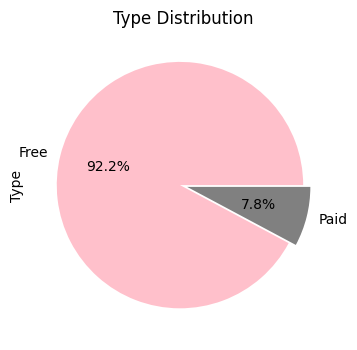

In [53]:
# Let's find out what % of apps are free and paid
df1["Type"].value_counts().plot.pie(autopct='%1.1f%%', figsize = (6,4), title = 'Type Distribution',colors = ['Pink','Grey'],explode=(0.03,0.03))

In our dataset, 92.2% apps are free while 7.8% are charging some amount.

In [54]:
# counting average installs for each type
df1.groupby('Type').mean()['Installs']

<ipython-input-54-fc781de47563>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('Type').mean()['Installs']


Type
Free    8.438903e+06
Paid    7.611404e+04
Name: Installs, dtype: float64

<Axes: >

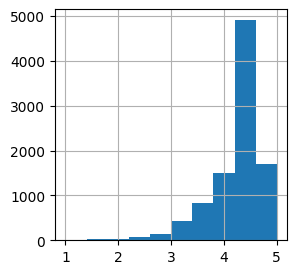

In [55]:
df1['Rating'].hist(figsize=(3,3))

from this, we can see mostly people have rated apps 4 and up

In [56]:
df1['Price'].max()

400.0

This was very obvious result, as users tend to download free apps without a thought.

<Axes: xlabel='Size'>

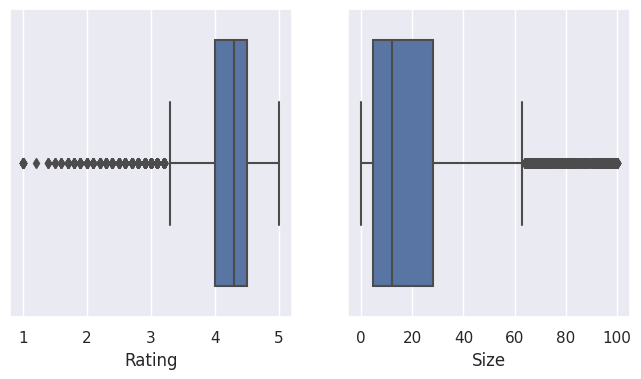

In [57]:
sns.set(rc={'figure.figsize':(8,4)})
fig, axes = plt.subplots(1,2)
sns.boxplot(data=df1,x='Rating', ax=axes[0])
sns.boxplot(data=df1[df1['Size']!='Varies with device'],x='Size', ax=axes[1])

<Axes: xlabel='Installs'>

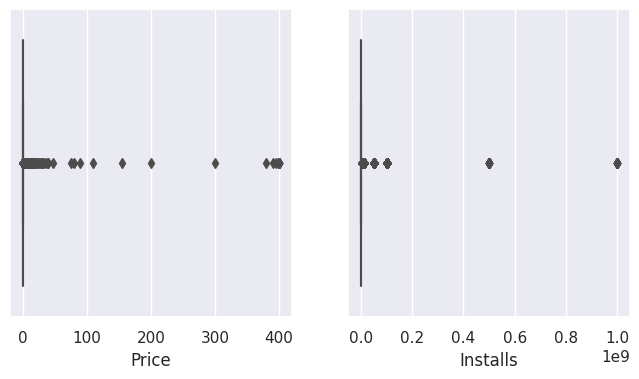

In [58]:
sns.set(rc={'figure.figsize':(8,4)})
fig, axes = plt.subplots(1,2)
sns.boxplot(data=df1,x='Price', ax=axes[0])
sns.boxplot(data=df1,x='Installs', ax=axes[1])

Text(0, 0.5, 'no of apps')

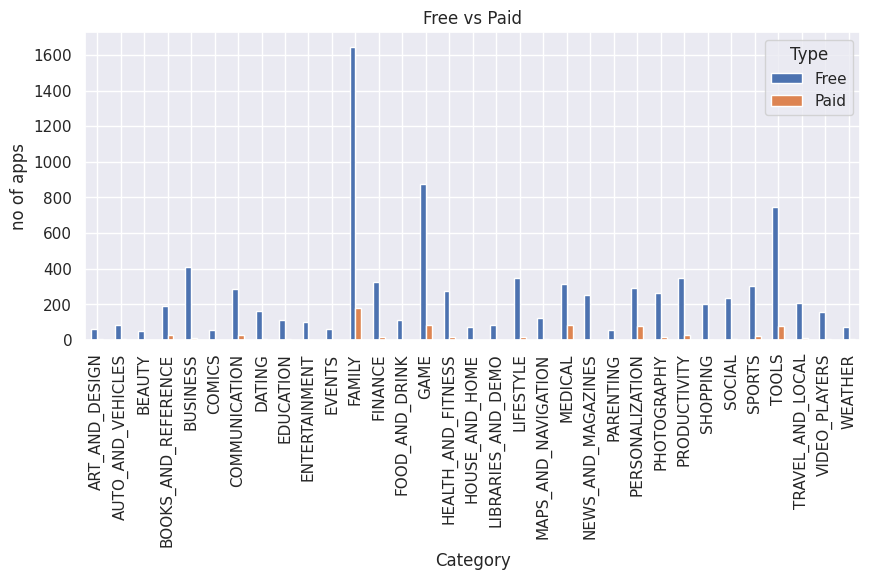

In [59]:
df1.groupby(['Category', 'Type'])['App'].count().unstack().plot(kind='bar', figsize=(10,4))
plt.title('Free vs Paid')
plt.xlabel('Category')
plt.ylabel('no of apps')

In [60]:
# Merging both the datasets with using the common column 'App'
new_df = pd.merge(df1, df2, on='App', how='inner')
new_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,month,year,Revenue,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
8322,Bloomberg Professional,FINANCE,4.1,3334,Varies with device,500000.0,Free,0.0,Everyone,Finance,2018-07-23,Varies with device,Varies with device,7,2018,0.0,useless ..you receive message u background..yo...,Negative,-0.500,0.20000
13701,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000.0,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,7,2018,0.0,Great game really kill stress. I like fact get...,Positive,0.200,0.45000
9242,Allrecipes Dinner Spinner,FOOD_AND_DRINK,4.5,61881,Varies with device,5000000.0,Free,0.0,Everyone,Food & Drink,2018-04-10,Varies with device,Varies with device,4,2018,0.0,"Great recipe organizer, add notes recipes. Neg...",Positive,0.025,0.60000
35733,Dumb Ways to Die 2: The Games,FAMILY,4.2,1671658,Varies with device,50000000.0,Free,0.0,Teen,Casual,2018-07-12,Varies with device,Varies with device,7,2018,0.0,The game good,Positive,0.150,0.50000
20391,Barbie Magical Fashion,FAMILY,4.0,328619,15.0,10000000.0,Free,0.0,Everyone,Casual;Creativity,2017-10-06,2.2,4.1 and up,10,2017,0.0,Best Girls... All r saying boring really mad.....,Positive,0.175,0.67619


In [61]:
new_df.shape

(35929, 20)

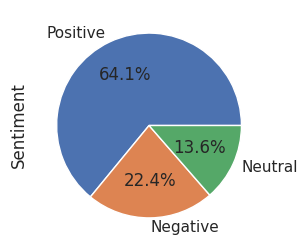

In [62]:
free_df=new_df[new_df['Type']=='Free']
paid_df=new_df[new_df['Type']=='Paid']

# sentiment is a categorial column, we will see how it varies differently in free and paid apps.
Sentiment_free_apps=free_df['Sentiment'].value_counts()

# Creating the pie plot
Sentiment_free_apps.plot(kind='pie',autopct='%1.1f%%', subplots=True, figsize=(3, 3))
plt.show()

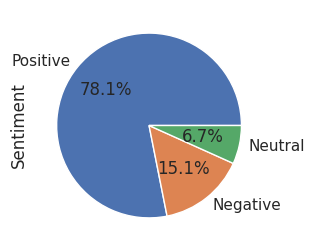

In [63]:
# similarly for the paid apps
Sentiment_paid_apps=paid_df['Sentiment'].value_counts()

# Creating the pie plot
Sentiment_paid_apps.plot(kind='pie',autopct='%1.1f%%', subplots=True, figsize=(3, 3))
plt.show()

we can clearly see that paid apps has more positive reviews.

#Installs and sentiment effect on the the rating

Text(0, 0.5, 'no of apps')

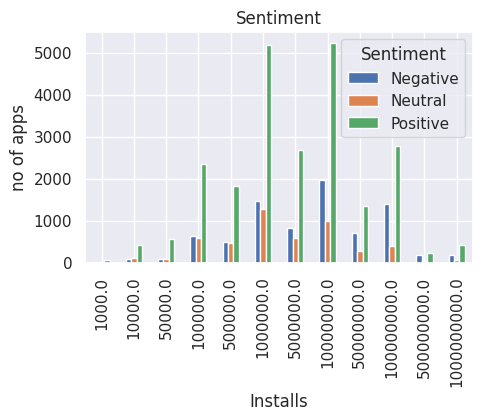

In [64]:
new_df.groupby(['Installs', 'Sentiment'])['App'].count().unstack().plot(kind='bar', figsize=(5,3))
plt.title('Sentiment')
plt.xlabel('Installs')
plt.ylabel('no of apps')

<ipython-input-65-2df291684449>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, center= 0, linewidths=2, linecolor='white')


<Axes: >

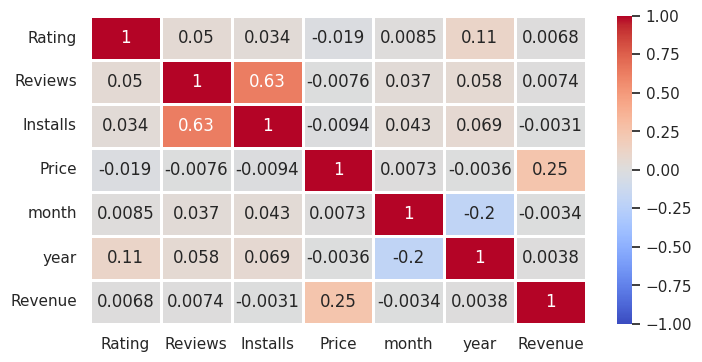

In [65]:
sns.heatmap(df1.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, center= 0, linewidths=2, linecolor='white')

From above coorelation heatmap, we can easily see that reviews and installs are highly coorelated, so we can state that no of installs depend on no of reviews.

In [66]:
df1['Content Rating'].value_counts()

Everyone           7893
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

<Axes: title={'center': 'Content Rating Distribution'}, ylabel='Content Rating'>

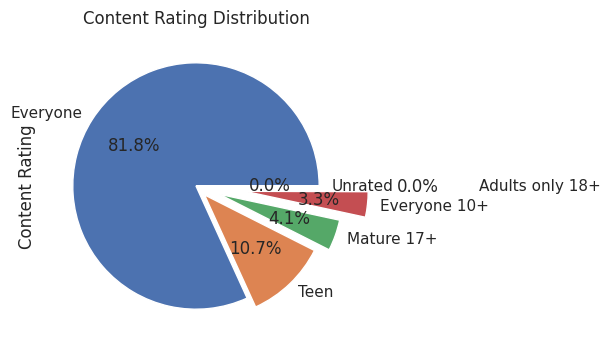

In [67]:
explode = [0, 0.1, 0.2, 0.4, 1.2, 0]
df1["Content Rating"].value_counts().plot.pie(autopct='%1.1f%%', figsize = (6,4), title = 'Content Rating Distribution',explode=explode)

In [68]:
Category_count = df1['Category'].value_counts().head(5)
Category_count
cat_index = Category_count.index
cat_values = Category_count.values
Category_df = pd.DataFrame({'Category': cat_index, 'No of apps': cat_values})
Category_df

,Category,No of apps
0,FAMILY,1828
1,GAME,959
2,TOOLS,825
3,BUSINESS,420
4,MEDICAL,395


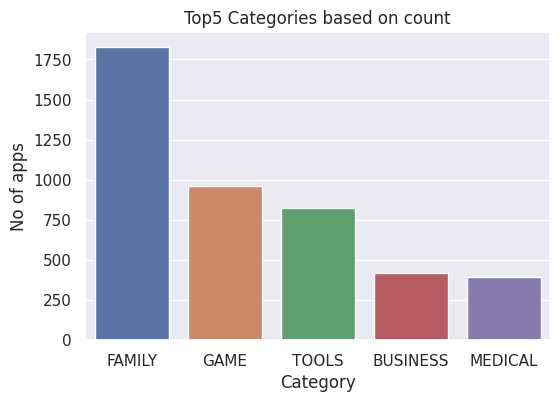

In [69]:
plt.figure(figsize=(6,4))
plt.title('Top5 Categories based on count')
sns.barplot(data = Category_df, x='Category', y='No of apps')
plt.show()

In [70]:
# Top 5 categories in terms of installs

# sns.barplot(data =df1, x='Category', y='Installs')
Installs_category = df1.groupby('Category').sum()['Installs'].sort_values(ascending=False).head(5)
Inst_cat = Installs_category.index
Inst_count = Installs_category.values
Installs_df = pd.DataFrame({'Category': Inst_cat, 'No of Installs': Inst_count})
Installs_df

<ipython-input-70-713b033129cb>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Installs_category = df1.groupby('Category').sum()['Installs'].sort_values(ascending=False).head(5)


,Category,No of Installs
0,GAME,1.387892e+10
1,COMMUNICATION,1.103828e+10
2,TOOLS,8.001272e+09
3,PRODUCTIVITY,5.793091e+09
4,SOCIAL,5.487868e+09


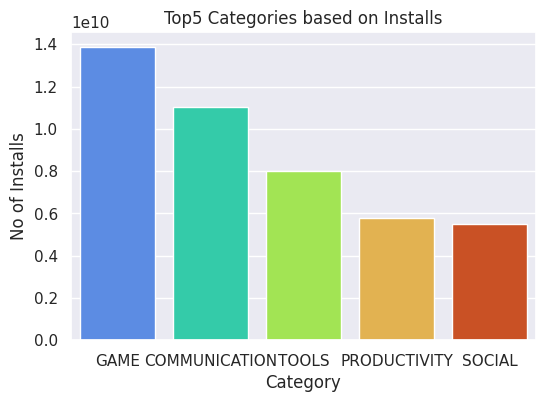

In [184]:
plt.figure(figsize=(6,4))
plt.title('Top5 Categories based on Installs')
sns.barplot(data = Installs_df, x='Category', y='No of Installs', palette = "turbo")
plt.show()

By above analysis, we can say;

*   'Game' has most no of installs and 'Game' also has the second highest no of apps available. So if new developers are thinking to make a gaming app then they should also consider how to compete with other existing players in gaming industry.
*  On the other hand, 'Family' has most no of existing apps but it's not even in Top5 in terms of installs, so it should be one of the least choice for any new developer.




In [174]:
# Top 5 categories in terms of revenue

Revenue_Category = df1.groupby('Category').sum()['Revenue'].sort_values(ascending=False).head(5)
Revenue_cat = Revenue_Category.index
Revenue_sum = Installs_category.values
Revenue_df = pd.DataFrame({'Category': Revenue_cat, 'Total Revenue': Revenue_sum})
Revenue_df

<ipython-input-174-d99f6fb1ed5a>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Revenue_Category = df1.groupby('Category').sum()['Revenue'].sort_values(ascending=False).head(5)


,Category,Total Revenue
0,FAMILY,1.387892e+10
1,LIFESTYLE,1.103828e+10
2,GAME,8.001272e+09
3,FINANCE,5.793091e+09
4,PHOTOGRAPHY,5.487868e+09


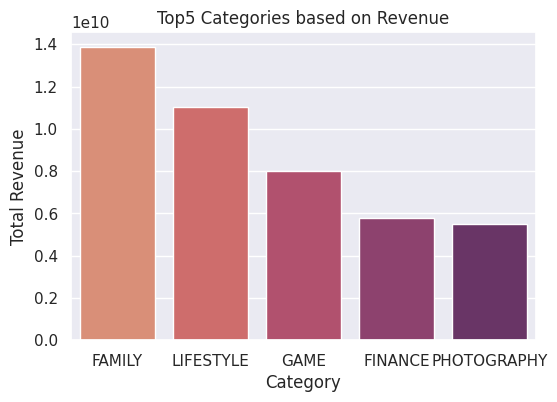

In [175]:
plt.figure(figsize=(6,4))
plt.title('Top5 Categories based on Revenue')
sns.barplot(data = Revenue_df, x='Category', y='Total Revenue', palette = "flare")
plt.show()

*  'Game' genre has generated maximum revenue with it's apps.
*  Overall 'Game' is the best genre for new developers to look for.

In [79]:
# # we want to see if rating can be right criteria for choosing the app for users.

rating_df = df1.groupby('Rating').mean().reset_index()
rating_df.sample(5)

<ipython-input-79-dcb61d7af428>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating_df = df1.groupby('Rating').mean().reset_index()


,Rating,Reviews,Installs,Price,month,year,Revenue
9,2.1,384.125000,2.275000e+04,0.000000,5.875000,2017.625000,0.000000
10,2.2,141.357143,1.521857e+05,0.000000,6.000000,2017.785714,0.000000
24,3.6,9886.353293,1.416268e+06,5.008443,6.473054,2017.077844,48238.434132
35,4.7,312895.653846,5.898810e+06,0.510000,6.409502,2017.608597,25154.029186
34,4.6,478541.330893,9.162858e+06,0.540908,6.571010,2017.587116,52251.789165


Month and year don't make any sense here we can ignore their values.

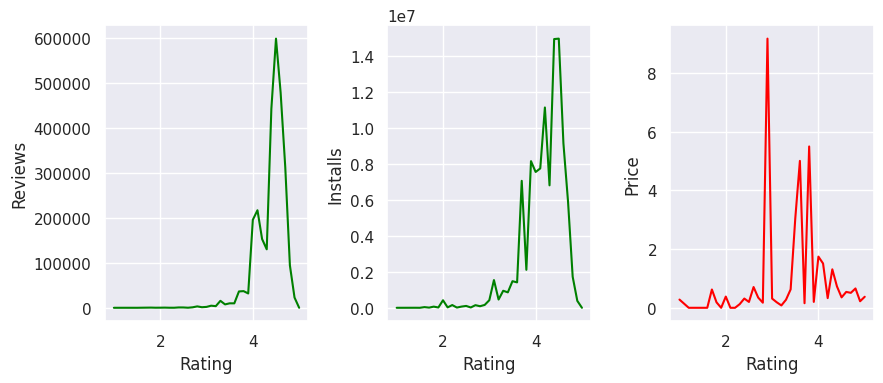

In [80]:
sns.set(rc={'figure.figsize':(9,4)})
fig, axes = plt.subplots(1,3)
#create lineplot in each subplot
sns.lineplot(data=rating_df, x='Rating', y='Reviews',color='green', ax=axes[0])
sns.lineplot(data=rating_df, x='Rating', y='Installs',color='green', ax=axes[1])
sns.lineplot(data=rating_df, x='Rating', y='Price',color='red', ax=axes[2])
fig.tight_layout()
plt.show()


we can see apps with rating 4.5 have more no of reviews and installs on an avergae but price doesn't go with tehe same pattern. Apps with rating 3 has high average price.

In [106]:
size_index = df1[df1['Size'] == 'Varies with device'].index
size_df = df1.drop(size_index)
size_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,month,year,Revenue
10169,Test Server SMS FA,COMMUNICATION,4.3,0,1.8,5.0,Free,0.00,Everyone,Communication,2018-07-27,1.0,4.0 and up,7,2018,0.0
9460,Ej-buy,BUSINESS,4.3,2,4.1,5.0,Free,0.00,Everyone,Business,2018-08-02,1.2.0,4.1 and up,8,2018,0.0
9151,Lost Journey (Dreamsky),GAME,4.5,32344,29.0,1000000.0,Paid,0.99,Everyone,Adventure,2016-10-21,1.3.12,3.0 and up,10,2016,990000.0
4513,Q Remote Control,TOOLS,3.8,4264,14.0,500000.0,Free,0.00,Everyone,Tools,2014-07-12,2.6.1,2.3 and up,7,2014,0.0
4552,R-net for Android,PRODUCTIVITY,3.3,48,0.06,5000.0,Free,0.00,Everyone,Productivity,2013-08-07,1.0,3.1 and up,8,2013,0.0


<Axes: >

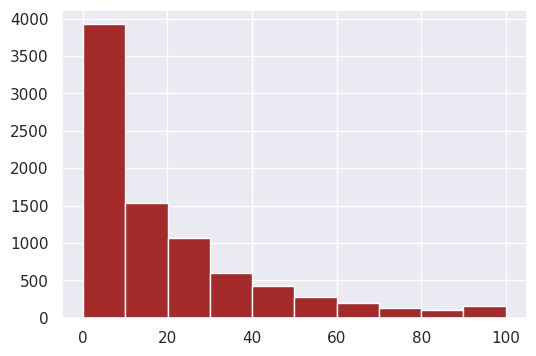

In [112]:
size_df['Size'].hist(figsize=(6,4), color = 'brown')

we can clearly see that mostly apps are in under 10 MB of size. we can state size of apps reversly propotional to no of apps.

In [118]:
new_size_df = size_df.groupby('Size').mean().reset_index()
new_size_df.sample(5)

<ipython-input-118-31c0ab5cc4c0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_size_df = size_df.groupby('Size').mean().reset_index()


,Size,Rating,Reviews,Installs,Price,month,year,Revenue
210,38.00,4.243137,46432.254902,2.590631e+06,0.078039,7.039216,2017.549020,58.821569
101,1.90,4.193750,17806.781250,7.899034e+05,0.046562,6.750000,2016.281250,0.465625
95,1.30,4.060000,3824.571429,6.807946e+05,1.411429,6.200000,2016.771429,8508.314286
26,0.28,4.400000,264.000000,7.500000e+03,0.995000,4.500000,2015.500000,9950.000000
21,0.23,3.760000,13438.000000,1.002020e+06,0.198000,6.200000,2014.800000,0.198000


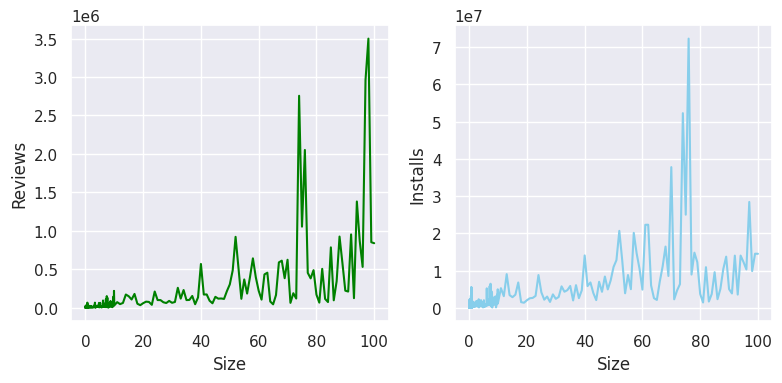

In [120]:
sns.set(rc={'figure.figsize':(8,4)})
fig, axes = plt.subplots(1,2)
#create lineplot in each subplot
sns.lineplot(data=new_size_df, x='Size', y='Reviews',color='green', ax=axes[0])
sns.lineplot(data=new_size_df, x='Size', y='Installs',color='skyblue', ax=axes[1])
fig.tight_layout()
plt.show()


By above two graphs, we can conclude that apps with size around 90-100 Mb has more no of reviews on an average. while apps with size around 70-80 has more no of installs

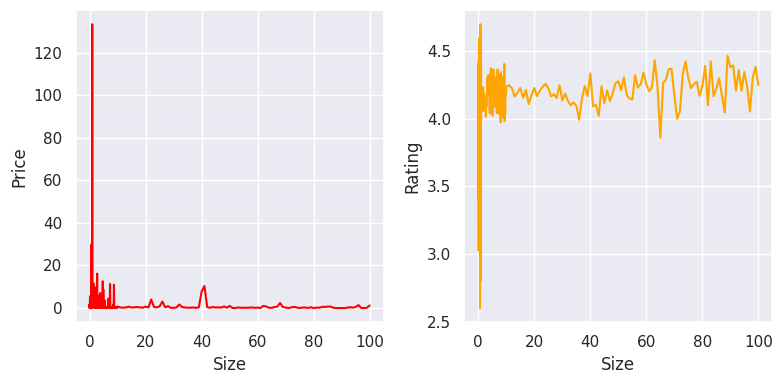

In [121]:
sns.set(rc={'figure.figsize':(8,4)})
fig, axes = plt.subplots(1,2)
sns.lineplot(data=new_size_df, x='Size', y='Price',color='red', ax=axes[0])
sns.lineplot(data=new_size_df, x='Size', y='Rating',color='orange', ax=axes[1])
fig.tight_layout()
plt.show()

By above two graphs, we can conclude that apps with size around 0-10 MB, apps has more price on an average.

Text(0, 0.5, 'no of apps')

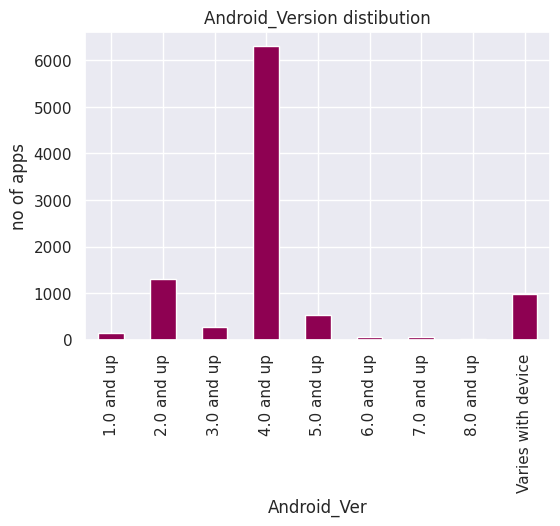

In [158]:
df1.groupby(['Android Ver'])['App'].count().plot(kind='bar', figsize=(6,4), cmap="PiYG")
plt.title('Android_Version distibution')
plt.xlabel('Android_Ver')
plt.ylabel('no of apps')

Text(0, 0.5, 'no of apps')

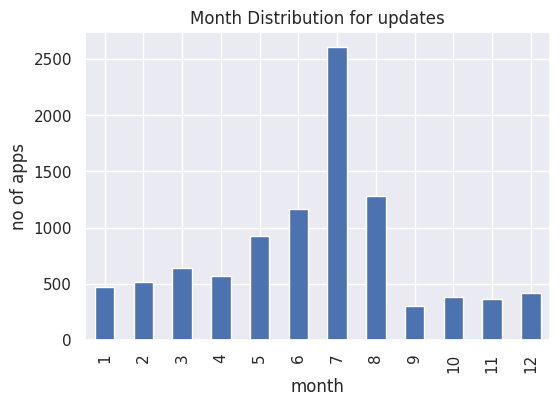

In [169]:
# plot the graph of app updates in month wise

df1.groupby(['month'])['App'].count().plot(kind='bar', figsize=(6,4))
plt.title('Month Distribution for updates')
plt.xlabel('month')
plt.ylabel('no of apps')

Most of the apps were updated in July month

Text(0, 0.5, 'no of apps')

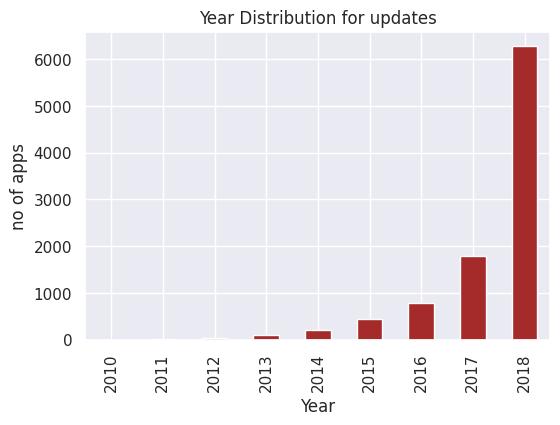

In [171]:
# plot the graph of app updates in month wise

df1.groupby(['year'])['App'].count().plot(kind='bar', figsize=(6,4), color ='brown')
plt.title('Year Distribution for updates')
plt.xlabel('Year')
plt.ylabel('no of apps')

Most of the apps were updated in 2018